#üìå Extracci√≥n

In [84]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import requests

url_telecomx = ('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
datos_telecomx = requests.get(url_telecomx)
data = json.loads(datos_telecomx.text)
pd.DataFrame(data)



customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1       {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
...                                                 ...   
7262     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7263    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
7264     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7265     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7266  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                               internet  \
0     {'InternetService': 'DSL', 'OnlineSecurity': '...   
1     {'InternetService': 'DSL', 'OnlineSecurity': '...   
2     {'InternetService': 'Fiber optic', 'OnlineSecu...   
3     {'InternetService': 'Fiber optic', 'OnlineSecu...   
4     {'InternetService': 'Fiber optic', 'OnlineSecu...   
...                                                 ...   
7262  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7263  {'InternetService': 'Fiber optic', 'OnlineSecu...   
7264  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7265  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7266  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                                account  
0     {'Contract': 'One year', 'PaperlessBilling': '...  
1     {'Contract': 'Month-to-month', 'PaperlessBilli...  
2     {'Contract': 'Month-to-month', 'PaperlessBilli...  
3     {'Contract': 'Month-to-month', 'PaperlessBilli...  
4     {'Contract': 'Month-to-month', 'PaperlessBilli...  
...                                                 ...  
7262  {'Contract': 'One year', 'PaperlessBilling': '...  
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7265  {'Contract': 'Two year', 'PaperlessBilling': '...  
7266  {'Contract': 'Two year', 'PaperlessBilling': '...  

[7267 rows x 6 columns]

In [85]:
# Normalizacion de la informacion contenida en el jason
datos_telecomx_norm = pd.json_normalize(data)
datos_telecomx_norm
datos_telecomx_norm.info()

datos_telecomx_norm.duplicated().sum()
datos_telecomx_norm.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

#üîß Transformaci√≥n

In [86]:
# Conversi√≥n a tipo float
datos_telecomx_norm['account.Charges.Total'] = pd.to_numeric(datos_telecomx_norm['account.Charges.Total'], errors="coerce")
datos_telecomx_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [87]:
# Eliminando filas vacias de la columna de Churn
datos_telecomx_norm = datos_telecomx_norm[datos_telecomx_norm['Churn'].str.strip() != '']
print("N√∫mero de filas despu√©s de eliminar las vac√≠as en 'Churn':", len(datos_telecomx_norm))
datos_telecomx_norm.info()

N√∫mero de filas despu√©s de eliminar las vac√≠as en 'Churn': 7043
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null  

In [88]:
# Calcular la media ignorando NaN
media_total = datos_telecomx_norm["account.Charges.Total"].mean()

# Reemplazar NaN por la media (sin inplace para evitar FutureWarning)
datos_telecomx_norm["account.Charges.Total"] = datos_telecomx_norm["account.Charges.Total"].fillna(media_total)

datos_telecomx_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [89]:
datos_telecomx_norm

customerID Churn customer.gender  customer.SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
0                 Yes                 Yes                9                Yes   
1                  No                  No                9                Yes   
2                  No                  No                4                Yes   
3                 Yes                  No               13                Yes   
4                 Yes                  No                3                Yes   
...               ...                 ...              ...                ...   
7262               No                  No               13                Yes   
7263              Yes                  No               22                Yes   
7264               No                  No                2                Yes   
7265              Yes                 Yes               67                Yes   
7266              Yes                 Yes               63                 No   

     phone.MultipleLines internet.InternetService  ... internet.OnlineBackup  \
0                     No                      DSL  ...                   Yes   
1                    Yes                      DSL  ...                    No   
2                     No              Fiber optic  ...                    No   
3                     No              Fiber optic  ...                   Yes   
4                     No              Fiber optic  ...                    No   
...                  ...                      ...  ...                   ...   
7262                  No                      DSL  ...                    No   
7263                 Yes              Fiber optic  ...                    No   
7264                  No                      DSL  ...                   Yes   
7265                  No                      DSL  ...                    No   
7266    No phone service                      DSL  ...                   Yes   

     internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                           No                  Yes                  Yes   
1                           No                   No                   No   
2                          Yes                   No                   No   
3                          Yes                   No                  Yes   
4                           No                  Yes                  Yes   
...                        ...                  ...                  ...   
7262                        No                  Yes                   No   
7263                        No                   No                   No   
7264                        No                   No                   No   
7265                       Yes                  Yes                   No   
7266                       Yes                   No                  Yes   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                          No         One year                      Yes   
1                         Yes   Month-to-month                       No   
2                          No   Month-to-month                      Yes   
3                         Yes   Month-to-month                    

In [90]:
# Crear la columna 'Cuentas_Diarias'
datos_telecomx_norm["Cuentas_Diarias"] = datos_telecomx_norm["account.Charges.Monthly"] / 30

print(datos_telecomx_norm[["account.Charges.Monthly", "Cuentas_Diarias"]].head())

   account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


In [91]:
# Renombramos los nombres de las columnas
datos_telecomx_norm.rename(columns={
    'customer.gender': 'gender', 'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner', 'customer.Dependents': 'Dependents',
    'customer.tenure': 'tenure', 'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines', 'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity', 'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection', 'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV', 'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract', 'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod', 'account.Charges.Monthly': 'Charges.Monthly',
    'account.Charges.Total': 'Charges.Total'
    }, inplace= True)

#üìä Carga y an√°lisis

In [92]:
# Generamos un analisis descriptivo de los datos
descripcion = datos_telecomx_norm.describe()
print(descripcion)

       SeniorCitizen       tenure  Charges.Monthly  Charges.Total  \
count    7043.000000  7043.000000      7043.000000    7043.000000   
mean        0.162147    32.371149        64.761692    2283.300441   
std         0.368612    24.559481        30.090047    2265.000258   
min         0.000000     0.000000        18.250000      18.800000   
25%         0.000000     9.000000        35.500000     402.225000   
50%         0.000000    29.000000        70.350000    1400.550000   
75%         0.000000    55.000000        89.850000    3786.600000   
max         1.000000    72.000000       118.750000    8684.800000   

       Cuentas_Diarias  
count      7043.000000  
mean          2.158723  
std           1.003002  
min           0.608333  
25%           1.183333  
50%           2.345000  
75%           2.995000  
max           3.958333  


## **Visualizaciones**


### 1. An√°lisis de facturaci√≥n

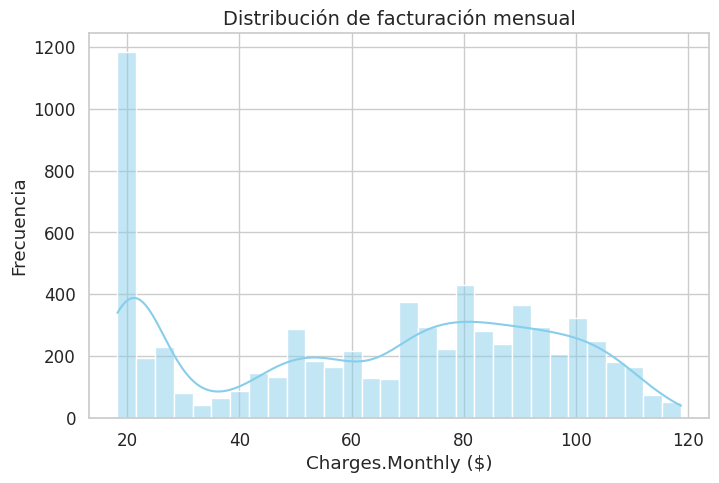

In [94]:
# Estilo de gr√°ficos
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1. Histograma de Charges.Monthly
plt.figure(figsize=(8,5))
sns.histplot(datos_telecomx_norm["Charges.Monthly"], bins=30, kde=True, color="skyblue")
plt.title("Distribuci√≥n de facturaci√≥n mensual", fontsize=14)
plt.xlabel("Charges.Monthly ($)")
plt.ylabel("Frecuencia")
plt.show()

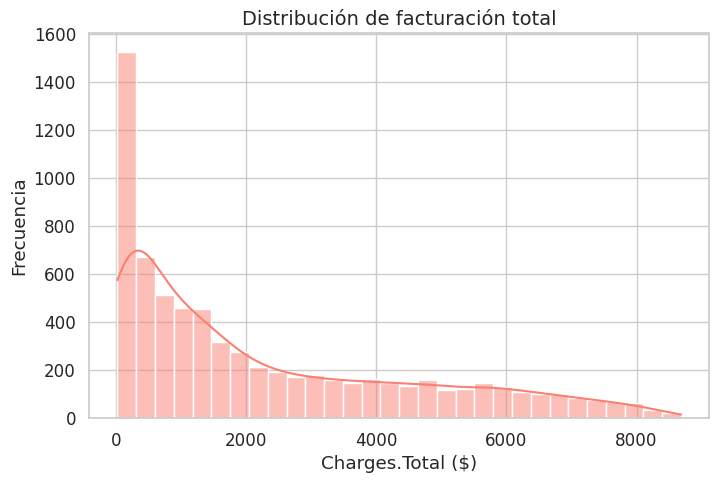

In [95]:
# 2. Histograma de Charges.Total
plt.figure(figsize=(8,5))
sns.histplot(datos_telecomx_norm["Charges.Total"], bins=30, kde=True, color="salmon")
plt.title("Distribuci√≥n de facturaci√≥n total", fontsize=14)
plt.xlabel("Charges.Total ($)")
plt.ylabel("Frecuencia")
plt.show()

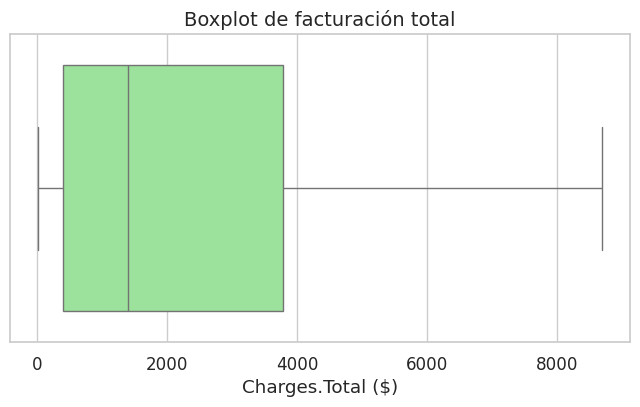

In [96]:
# 3. Boxplot de Charges.Total (detectar outliers)
plt.figure(figsize=(8,4))
sns.boxplot(x=datos_telecomx_norm["Charges.Total"], color="lightgreen")
plt.title("Boxplot de facturaci√≥n total", fontsize=14)
plt.xlabel("Charges.Total ($)")
plt.show()

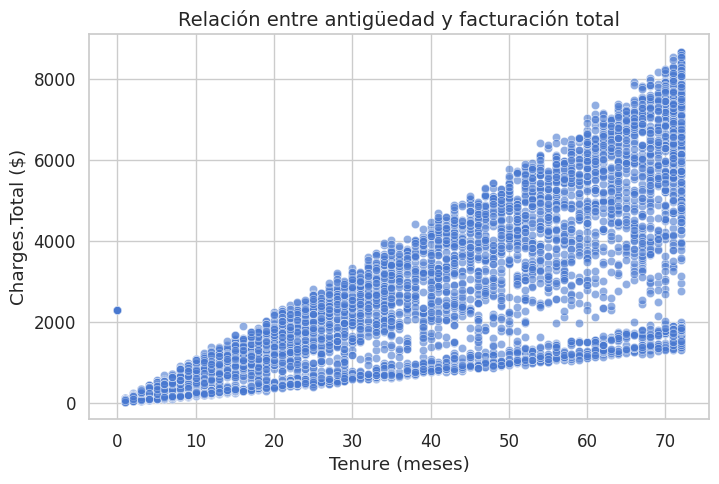

In [97]:
# 4. Dispersi√≥n tenure vs Charges.Total
plt.figure(figsize=(8,5))
sns.scatterplot(x="tenure", y="Charges.Total", data=datos_telecomx_norm, alpha=0.6)
plt.title("Relaci√≥n entre antig√ºedad y facturaci√≥n total", fontsize=14)
plt.xlabel("Tenure (meses)")
plt.ylabel("Charges.Total ($)")
plt.show()

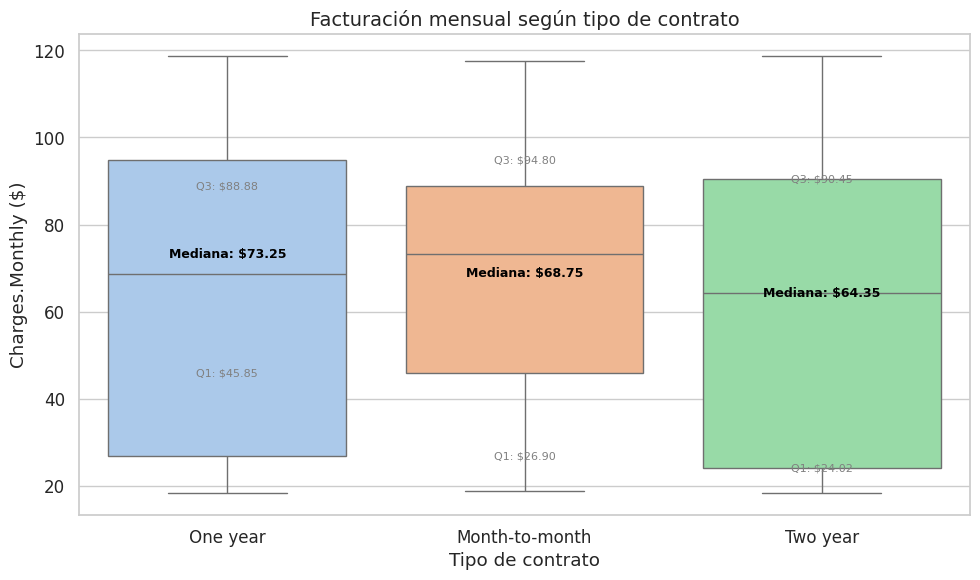

In [98]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Contract", y="Charges.Monthly", hue="Contract",
            data=datos_telecomx_norm, palette="pastel", legend=False)

plt.title("Facturaci√≥n mensual seg√∫n tipo de contrato", fontsize=14)
plt.xlabel("Tipo de contrato")
plt.ylabel("Charges.Monthly ($)")

# Calcular y mostrar estad√≠sticos en cada caja
grouped = datos_telecomx_norm.groupby('Contract')['Charges.Monthly']
for i, (contract_type, group) in enumerate(grouped):
    q1 = group.quantile(0.25)
    median = group.median()
    q3 = group.quantile(0.75)

    # Mostrar los valores sobre la caja
    plt.text(i, median, f'Mediana: ${median:.2f}', ha='center', va='center', fontsize=9, color='black', fontweight='bold')
    plt.text(i, q1, f'Q1: ${q1:.2f}', ha='center', va='center', fontsize=8, color='gray')
    plt.text(i, q3, f'Q3: ${q3:.2f}', ha='center', va='center', fontsize=8, color='gray')

plt.tight_layout()
plt.show()

### 2. Perfil del cliente

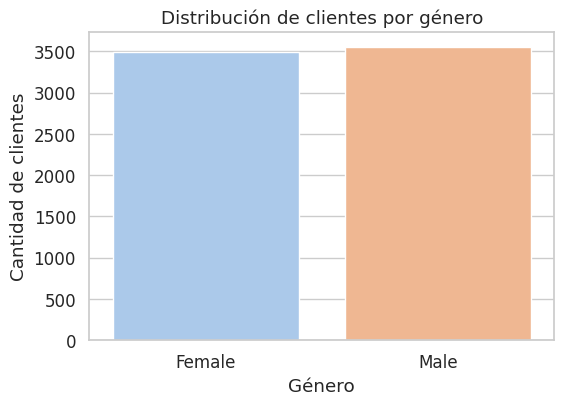

In [99]:
# 1. Distribuci√≥n por g√©nero
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="gender", data=datos_telecomx_norm, palette="pastel", legend=False)
plt.title("Distribuci√≥n de clientes por g√©nero")
plt.xlabel("G√©nero")
plt.ylabel("Cantidad de clientes")
plt.show()

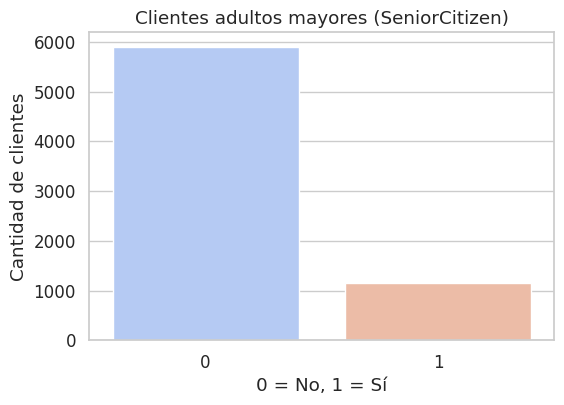

In [100]:
# 2. Porcentaje SeniorCitizen
plt.figure(figsize=(6,4))
sns.countplot(x="SeniorCitizen", hue="SeniorCitizen", data=datos_telecomx_norm, palette="coolwarm", legend=False)
plt.title("Clientes adultos mayores (SeniorCitizen)")
plt.xlabel("0 = No, 1 = S√≠")
plt.ylabel("Cantidad de clientes")
plt.show()

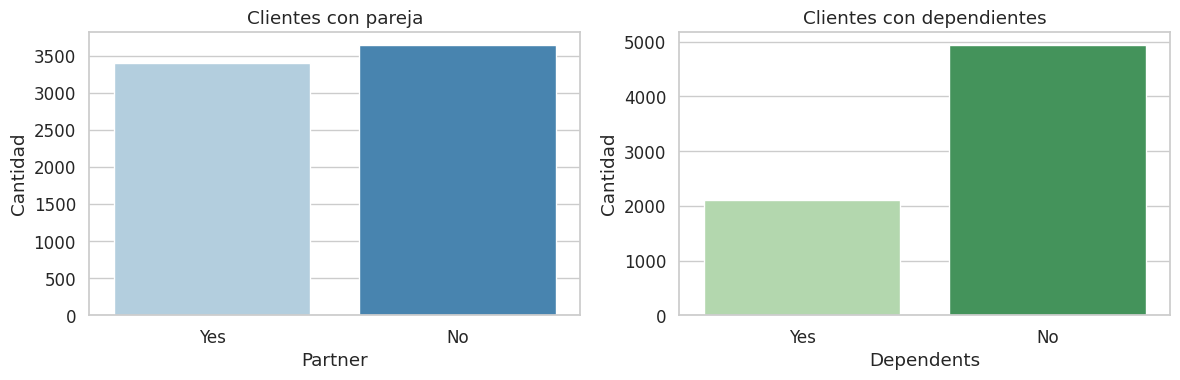

In [101]:
# 3. Distribuci√≥n de Partner y Dependents
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.countplot(x="Partner", hue="Partner", data=datos_telecomx_norm, ax=ax[0], palette="Blues", legend=False)
ax[0].set_title("Clientes con pareja")
ax[0].set_xlabel("Partner")
ax[0].set_ylabel("Cantidad")

sns.countplot(x="Dependents", hue="Dependents", data=datos_telecomx_norm, ax=ax[1], palette="Greens", legend=False)
ax[1].set_title("Clientes con dependientes")
ax[1].set_xlabel("Dependents")
ax[1].set_ylabel("Cantidad")

plt.tight_layout()
plt.show()

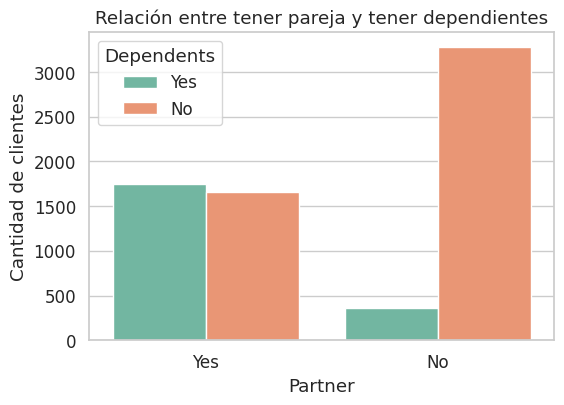

In [102]:
# 4. Relaci√≥n Partner vs Dependents
plt.figure(figsize=(6,4))
sns.countplot(x="Partner", hue="Dependents", data=datos_telecomx_norm, palette="Set2")
plt.title("Relaci√≥n entre tener pareja y tener dependientes")
plt.xlabel("Partner")
plt.ylabel("Cantidad de clientes")
plt.show()

/tmp/ipython-input-2966193096.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  servicios_binarios = datos_telecomx_norm[servicios_cols].applymap(lambda x: 1 if x=="Yes" else 0)


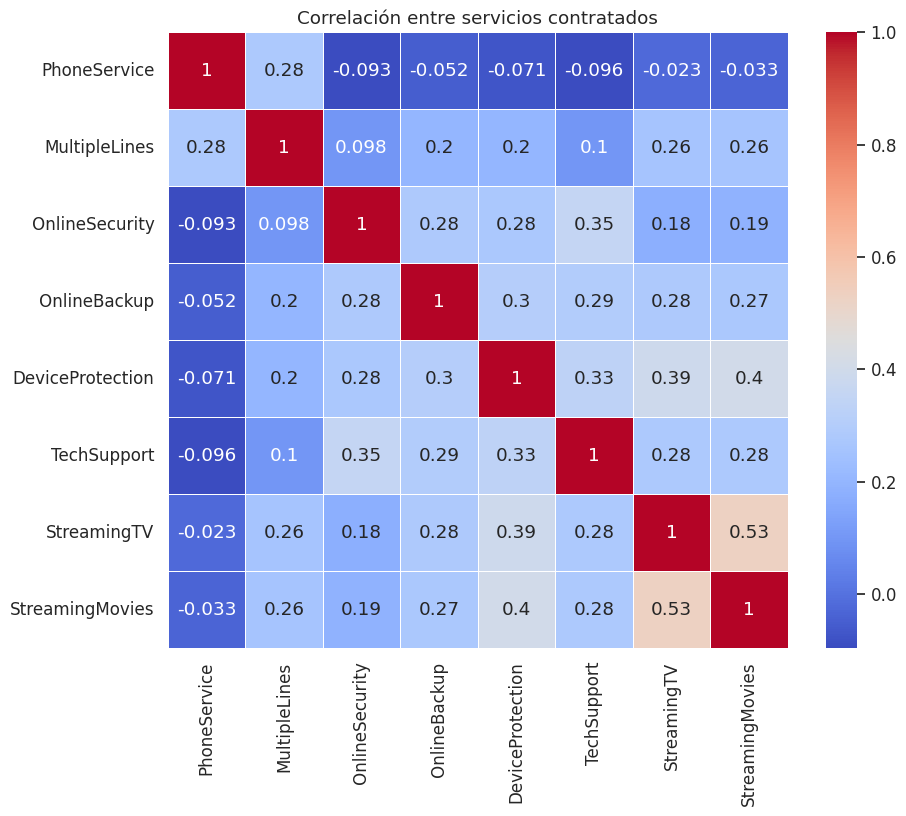

In [103]:
# 5. Heatmap de correlaciones entre servicios contratados
# Seleccionar columnas de servicios (convertir Yes/No a 1/0 para correlaci√≥n)
servicios_cols = ["PhoneService", "MultipleLines",
                  "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                  "TechSupport", "StreamingTV", "StreamingMovies"]

# Convertir valores Yes/No a 1/0 para correlaci√≥n
servicios_binarios = datos_telecomx_norm[servicios_cols].applymap(lambda x: 1 if x=="Yes" else 0)

plt.figure(figsize=(10,8))
sns.heatmap(servicios_binarios.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlaci√≥n entre servicios contratados")
plt.show()

### 3. Relaci√≥n con el Churn

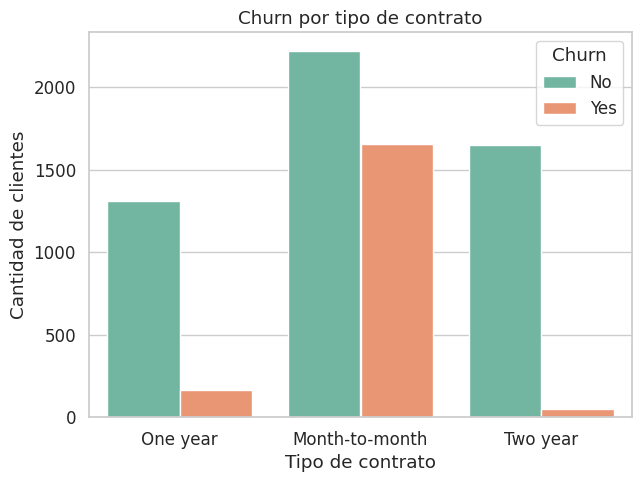

In [104]:
# 1. Churn por tipo de contrato
plt.figure(figsize=(7,5))
sns.countplot(x="Contract", hue="Churn", data=datos_telecomx_norm, palette="Set2")
plt.title("Churn por tipo de contrato")
plt.xlabel("Tipo de contrato")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Churn")
plt.show()

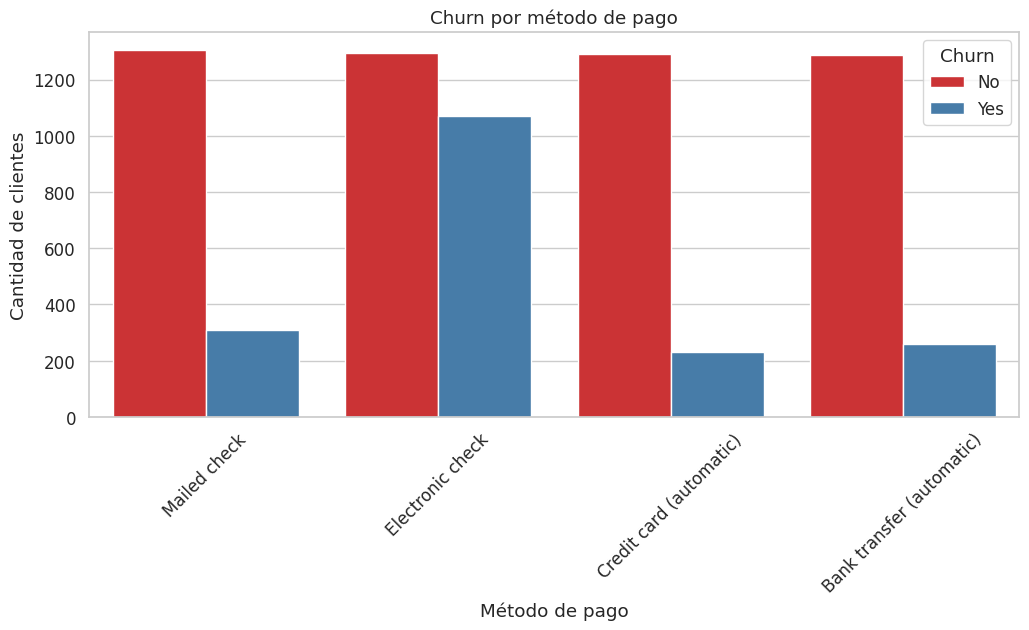

In [105]:
plt.figure(figsize=(12,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=datos_telecomx_norm, palette="Set1")
plt.title("Churn por m√©todo de pago")
plt.xlabel("M√©todo de pago")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=45)
plt.legend(title="Churn")
plt.show()

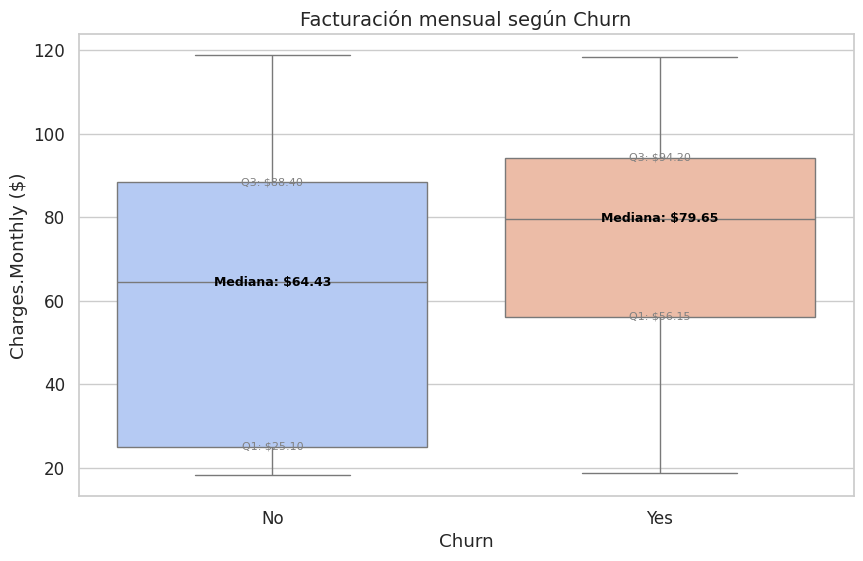

In [106]:
# 3. Comparaci√≥n de facturaci√≥n mensual seg√∫n Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x="Churn", y="Charges.Monthly", hue="Churn",
            data=datos_telecomx_norm, palette="coolwarm", legend=False)

plt.title("Facturaci√≥n mensual seg√∫n Churn", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Charges.Monthly ($)")

## Calcular y mostrar estad√≠sticos en cada caja
grouped = datos_telecomx_norm.groupby('Churn')['Charges.Monthly']
for i, (contract_type, group) in enumerate(grouped):
    q1 = group.quantile(0.25)
    median = group.median()
    q3 = group.quantile(0.75)

    # Mostrar los valores sobre la caja
    plt.text(i, median, f'Mediana: ${median:.2f}', ha='center', va='center', fontsize=9, color='black', fontweight='bold')
    plt.text(i, q1, f'Q1: ${q1:.2f}', ha='center', va='center', fontsize=8, color='gray')
    plt.text(i, q3, f'Q3: ${q3:.2f}', ha='center', va='center', fontsize=8, color='gray')


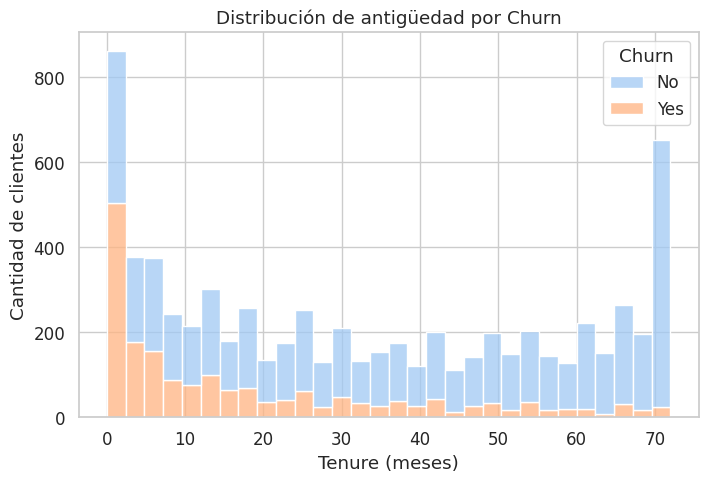

In [107]:
# 4. Histograma de antig√ºedad (tenure) por Churn
plt.figure(figsize=(8,5))
sns.histplot(data=datos_telecomx_norm, x="tenure", hue="Churn", multiple="stack", bins=30, palette="pastel")
plt.title("Distribuci√≥n de antig√ºedad por Churn")
plt.xlabel("Tenure (meses)")
plt.ylabel("Cantidad de clientes")
plt.show()

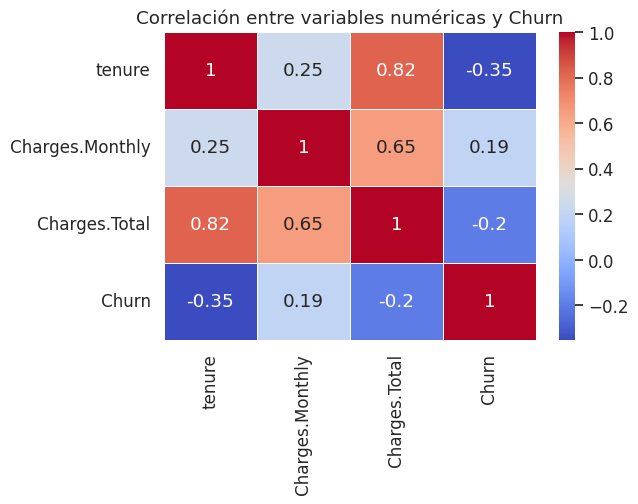

In [108]:
# 5. Mapa de calor de correlaciones num√©ricas con Churn
# Convertir Churn a 1/0
datos_corr = datos_telecomx_norm.copy()
datos_corr["Churn"] = datos_corr["Churn"].map({"Yes": 1, "No": 0})

# Selecci√≥n de columnas num√©ricas relevantes
num_cols = ["tenure", "Charges.Monthly", "Charges.Total", "Churn"]
plt.figure(figsize=(6,4))
sns.heatmap(datos_corr[num_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlaci√≥n entre variables num√©ricas y Churn")
plt.show()

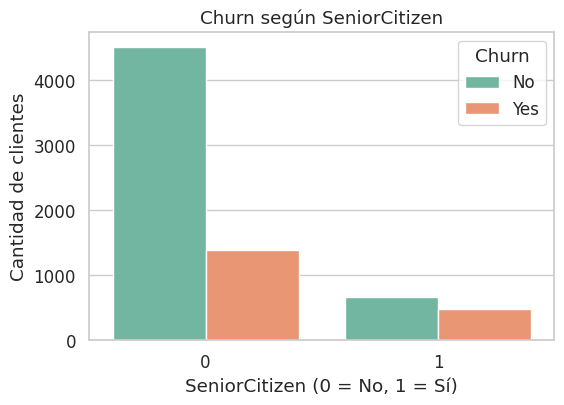

In [109]:
# 1. Churn vs SeniorCitizen
plt.figure(figsize=(6,4))
sns.countplot(x="SeniorCitizen", hue="Churn", data=datos_telecomx_norm, palette="Set2")
plt.title("Churn seg√∫n SeniorCitizen")
plt.xlabel("SeniorCitizen (0 = No, 1 = S√≠)")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Churn")
plt.show()

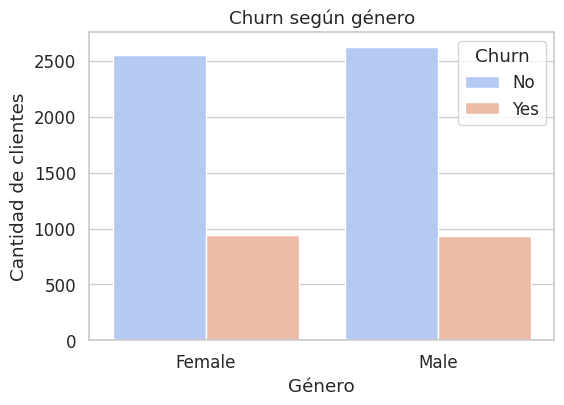

In [110]:
# 2. Churn vs gender
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="Churn", data=datos_telecomx_norm, palette="coolwarm")
plt.title("Churn seg√∫n g√©nero")
plt.xlabel("G√©nero")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Churn")
plt.show()

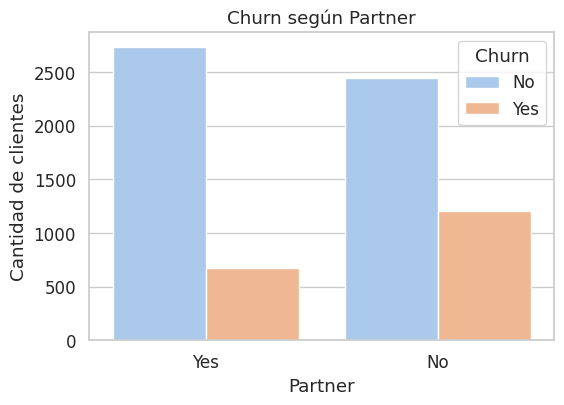

In [111]:
# 3. Churn vs Partner
plt.figure(figsize=(6,4))
sns.countplot(x="Partner", hue="Churn", data=datos_telecomx_norm, palette="pastel")
plt.title("Churn seg√∫n Partner")
plt.xlabel("Partner")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Churn")
plt.show()

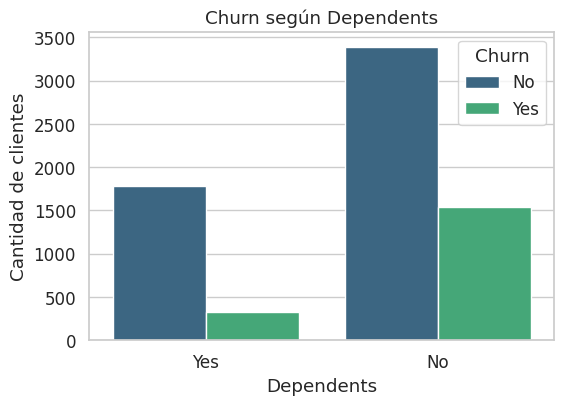

In [112]:
# 4. Churn vs Dependents
plt.figure(figsize=(6,4))
sns.countplot(x="Dependents", hue="Churn", data=datos_telecomx_norm, palette="viridis")
plt.title("Churn seg√∫n Dependents")
plt.xlabel("Dependents")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Churn")
plt.show()

#üìÑInforme final

#Informe Final ‚Äì An√°lisis de Clientes y Churn en TelecomX
##üîπ Introducci√≥n
El presente an√°lisis tiene como objetivo identificar patrones en el comportamiento de los clientes de TelecomX, con especial atenci√≥n al problema de evasi√≥n de clientes (Churn).
El churn representa la proporci√≥n de clientes que cancelan el servicio en un periodo determinado. Un alto churn implica p√©rdida de ingresos, incremento en costos de adquisici√≥n de nuevos clientes y posibles fallas en la propuesta de valor.
Por ello, se realiz√≥ un an√°lisis integral que incluye facturaci√≥n, perfil sociodemogr√°fico y relaci√≥n de caracter√≠sticas con el churn, con el fin de generar insights que permitan reducir la rotaci√≥n y mejorar la retenci√≥n.

##üîπ Limpieza y Tratamiento de Datos
Para garantizar la calidad y confiabilidad del an√°lisis, se llevaron a cabo los siguientes pasos:

- Importaci√≥n de datos desde el archivo telecomx.xlsx y almacenamiento en un DataFrame (datos_telecomx_norm).

- **Conversi√≥n de tipos de datos**: Charges.Total convertido a formato float para permitir operaciones num√©ricas.

- **Tratamiento de valores faltantes (NaN)**: Reemplazo por la media de la columna en Charges.Total para no sesgar el an√°lisis.

- **Creaci√≥n de variables derivadas**: Cuentas_Diarias calculada dividiendo la facturaci√≥n mensual (Charges.Monthly) entre 30, para obtener una visi√≥n de gasto diario.

- **Verificaci√≥n final**: Se asegur√≥ que todas las columnas relevantes estuvieran listas para el an√°lisis exploratorio.


##üîπ An√°lisis Exploratorio de Datos
### 1. An√°lisis de Facturaci√≥n
Objetivo: Comprender la distribuci√≥n de ingresos y su relaci√≥n con la permanencia de clientes.

*Hallazgos visuales:*

- Los clientes con facturaci√≥n mensual m√°s alta suelen tener contratos a m√°s largo plazo.

- Se observan picos en montos mensuales asociados a paquetes premium con m√∫ltiples servicios.

- El churn es m√°s alto en clientes con facturas bajas o medias, posiblemente por baja percepci√≥n de valor o acceso a ofertas m√°s econ√≥micas en la competencia.

### 2. Perfil del Cliente
Objetivo: Identificar las caracter√≠sticas demogr√°ficas y contractuales predominantes en la base de clientes.

*Hallazgos visuales:*

- Mayor√≠a de clientes no SeniorCitizen y con g√©nero equilibrado (masculino/femenino).

- Contratos m√°s frecuentes: mes a mes, seguidos por anual.

- Alto porcentaje de clientes con facturaci√≥n electr√≥nica y pago autom√°tico.

### 3. Relaci√≥n con el Churn
Objetivo: Analizar c√≥mo variables demogr√°ficas y contractuales influyen en la cancelaci√≥n.

*Hallazgos visuales y anal√≠ticos:*

- Edad: SeniorCitizen presenta mayor churn.

- G√©nero: No hay diferencia significativa.

- Relaciones familiares: Tener pareja o dependientes reduce el churn.

- Combinaci√≥n Partner + Dependents: El grupo con pareja y dependientes tiene la menor rotaci√≥n; los que no tienen pareja ni dependientes son los m√°s propensos a irse.

- Servicios adicionales: Clientes con menos servicios contratados tienden a cancelar antes.

##üîπ Conclusiones e Insights
- **Facturaci√≥n y retenci√≥n est√°n relacionadas**: Clientes con mayores gastos tienden a mantener contratos m√°s largos.

- **SeniorCitizen vulnerable**: Mayor riesgo de rotaci√≥n, posiblemente por barreras tecnol√≥gicas o percepci√≥n de precio elevado.

- **Fuerte relaci√≥n entre vida familiar y permanencia**: Clientes sin pareja ni dependientes presentan la mayor probabilidad de churn.

- Poca influencia del g√©nero en la decisi√≥n de cancelaci√≥n.

- **Servicios adicionales como palanca de retenci√≥n**: Paquetes m√°s completos parecen correlacionarse con mayor permanencia.

##üîπ Recomendaciones
- **Campa√±as de retenci√≥n espec√≠ficas para clientes SeniorCitizen**:

  - Soporte personalizado.

  - Capacitaci√≥n digital.

  - Descuentos o paquetes adaptados.

- Ofertas familiares o grupales para clientes sin pareja o dependientes.

- **Incentivos por servicios adicionales**: Descuentos por paquetes combinados (TV + Internet + M√≥vil).

- **Monitoreo proactivo del churn**: Implementar modelos predictivos para identificar clientes con alto riesgo y actuar antes de la cancelaci√≥n.

- **Optimizaci√≥n de la percepci√≥n de valor**: Comunicaci√≥n clara de beneficios, mejoras en la atenci√≥n y flexibilidad contractual.